# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
interesting_jobs = ["Уборщик", "Водитель мусоровоза", "Продавец",
                    "Курьер", "Web-дизайнер"]

for job in interesting_jobs:
  params['text'] = job
  data = requests.get(URL, params).json()
  print(job + ":")

  for counter, item in enumerate(data["items"]):
    print(str(counter + 1) + ". " + item["name"])
  print()

Уборщик:
1. Горничная в дом (семью) / Домработница / Домработник
2. Уборщик/уборщица офисных помещений
3. Старшая горничная
4. Вечерняя Уборщица/вечерний уборщик офиса
5. Утренняя уборщица/утренний уборщик
6. Утренняя уборщица
7. Горничная в детский сад
8. Утренняя Уборщица/утренний уборщик
9. Уборщица/Уборщик
10. Уборщица/Уборщик (Айти компания)

Водитель мусоровоза:
1. Водитель мусоровоза
2. Водитель категории С
3. Механик автомобильной колонны
4. Водитель мусоровоза, бункеровоза
5. Водитель категории С, мусоровоза, фаун
6. Водитель мусоровоза- мультилифт
7. Водитель категории С, мусоровоза, мультилифта, фаун
8. Водитель категории С
9. Водитель мусоровоза
10. Водитель на бункеровоз (рогатку)

Продавец:
1. Менеджер интернет-магазина "Все для кондитера" / Продавец
2. Продавец-консультант в "Beauty-Boutique", г. Москва (маникюрные инструменты, уходовая косметика)
3. Продавец-консультант, г.Москва
4. Продавец музыкальных инструментов на маркетплейсах и в розницу
5. Продавец-консультант в

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
interesting_jobs = ["Уборщик", "Водитель мусоровоза", "Продавец",
                    "Курьер", "Web-дизайнер"]

for job in interesting_jobs:
  params['text'] = job
  params["per_page"] = 20
  data = requests.get(URL, params).json()
  print(job + ":")
  vacancies = (data["pages"] - 1) * params["per_page"]
  params["page"] = data["pages"] - 1
  data = requests.get(URL, params).json()
  vacancies += len(data["items"])
  print(str(vacancies) + " vacancies found")

Уборщик:
1859 vacancies found
Водитель мусоровоза:
14 vacancies found
Продавец:
2000 vacancies found
Курьер:
2000 vacancies found
Web-дизайнер:
240 vacancies found


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
  name = "default name"
  longitude = 0
  latitude = 0
  def __init__(self, name: str, longitude: float, latitude: float):
    self.name = name
    self.longitude = longitude
    self.latitude = latitude

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
interesting_jobs = ["Уборщик"]

companies = []

for job in interesting_jobs:
  params["text"] = job
  params["page"] = 0
  params["per_page"] = 10
  data = requests.get(URL, params).json()
  print("---->" + job + ": " + str(data["pages"]) + " pages\n\n")
  for page in range(0, data["pages"]):
    params["page"] = page
    data = requests.get(URL, params).json()
    sleep(0.1)
    for item in data["items"]:
      name = item["employer"]["name"]
      try:
        longitude = item["address"]["lng"]
        latitude = item["address"]["lat"]
      except:
        longitude = None
        latitude = None
        
      company_to_add = Company(name, longitude, latitude)
      companies.append(company_to_add)
      print(company_to_add.name + " " + str(company_to_add.longitude) + ", " + str(company_to_add.latitude))
  print("----->   done with this job !!!")

---->Уборщик: 186 pages


Константа 37.259935, 55.730106
КНГК-ИНПЗ 37.564105, 55.723247
Столичное сервисное агентство 37.403118, 55.803697
СНС, Группа компаний 37.540497, 55.74823
КонсультантПлюс 37.562874, 55.67793
МБ группа Импэкс 37.597603, 55.717538
Частный детский сад Le Chat Botte None, None
ОБК None, None
Центр Звёздный 37.552292, 55.73184
Positive Technologies None, None
ВЛАДИС 37.669288, 55.731257
MacCoffee 37.560107, 55.783686
ФБУЗ ИМЦ Роспотребнадзора 37.596749, 55.78973
Гарант 37.521632, 55.708364
Домашний персонал None, None
Стоматология На Зубовском 37.588584, 55.738591
G-Group 37.627229, 55.770051
Риалвеб, Интернет-агентство 37.63553, 55.737958
Альтасеилс None, None
Цеппелин. Управляющая компания None, None
Берёзкина Анна Васильевна None, None
Skillbox None, None
Такс Комплаенс 37.535071, 55.747622
ФГБУ ЦНИИСиЧЛХ 37.59047, 55.73441
Коворкинг Психологи None, None
Прямой работодатель None, None
ЦНИТИ Техномаш-ВОС 37.452067, 55.72814
Московский политехнический университет 3

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
has_location = 0
no_location = 0
for company in companies:
  if (company.latitude == None or company.longitude == None):
    no_location += 1
    continue
  has_location += 1

print("Всего найдено " + str(has_location + no_location) + " локаций")
print("Среди них " + str(has_location) + " указали координаты")

Всего найдено 1859 локаций
Среди них 1455 указали координаты


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
has_location = 0
no_location = 0

sifted_vacancies = []

for company in companies:
  if (company.latitude == None or company.longitude == None):
    no_location += 1
    continue
  has_location += 1
  if (37.3678 < company.longitude < 37.8427426 and
        55.5778773 < company.latitude < 55.908376):
    sifted_vacancies.append(company)

print("Всего найдено " + str(has_location + no_location) + " локаций")
print("Среди них " + str(has_location) + " указали координаты")
print("Из них " + str(len(sifted_vacancies)) + " находятся в пределах МКАД")

Всего найдено 1859 локаций
Среди них 1455 указали координаты
Из них 1277 находятся в пределах МКАД


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

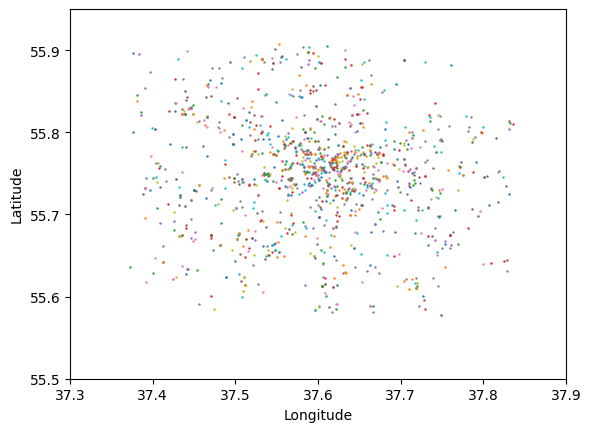

In [ ]:
  for company in companies:
    if (company.latitude == None or company.longitude == None):
      continue
    if (37.3678 < company.longitude < 37.8427426 and
          55.5778773 < company.latitude < 55.908376):
      plt.scatter(company.longitude, company.latitude, s=0.5)

  plt.axis([37.3, 37.9, 55.5, 55.95])
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
import pandas as pd
import plotly.express as px

us_cities = {
  "lat": [],
  "lon": []
}

for company in companies:
  if (company.latitude == None or company.longitude == None):
    continue
  if (37.3678 < company.longitude < 37.8427426 and
        55.5778773 < company.latitude < 55.908376):
    us_cities["lon"].append(company.longitude)
    us_cities["lat"].append(company.latitude)

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", zoom=8, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

Вывод: теперь у меня есть jupyter-notebook, в котором я могу быстро
найти примеры использования pandas/numpy/matplotlib
Также после проделывания лабораторной работы очевидно, что работа с большинством
API тривиальна

ы

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [1]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 191MB/s]


Создадим DataFrame:

In [2]:
import pandas as pd
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
diamonds.shape[0]

219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
s_min = diamonds.loc[diamonds['total_sales_price'] == diamonds['total_sales_price'].min()].index.tolist()
s_max = diamonds.loc[diamonds['total_sales_price'] == diamonds['total_sales_price'].max()].index.tolist()

print(str(s_min) + " - " + str(diamonds['total_sales_price'].min()))
print(str(s_max) + " - " + str(diamonds['total_sales_price'].max()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] - 200
[219702] - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
counter = 0

for i, row in diamonds.iterrows():
  for j in range(len(row)):
    if (diamonds.iloc[i, j] == "unknown" or
        diamonds.iloc[i, j] == None):
      counter += 1

counter
# diamonds.isnull().sum().sum() doesn't work :(

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
cols = set()

for i, row in diamonds.iterrows():
  for j in range(len(row)):
    if (diamonds.iloc[i, j] == "unknown" or
        diamonds.iloc[i, j] == None):
      cols.add(j)

print(cols)

{2, 5, 9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24}


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
filtered_cols = diamonds.filter(regex='^(fancy_color_|fluor_)')
len(filtered_cols.columns)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [ ]:
diamonds.shape[0] * diamonds.shape[1] - counter

3966251

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [3]:
diamonds.drop(columns=diamonds.filter(regex='(fancy_color_|fluor_)'), inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [4]:
diamonds.drop(columns=diamonds.filter(regex='(culet_)'), inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
diamonds["total_sales_price"].sum()

1517721991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds.iloc[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds.iloc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
diamonds.select_dtypes(include='object')

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,N,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
diamonds[['total_sales_price']] * diamonds[['total_sales_price']].transpose()

In [ ]:
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

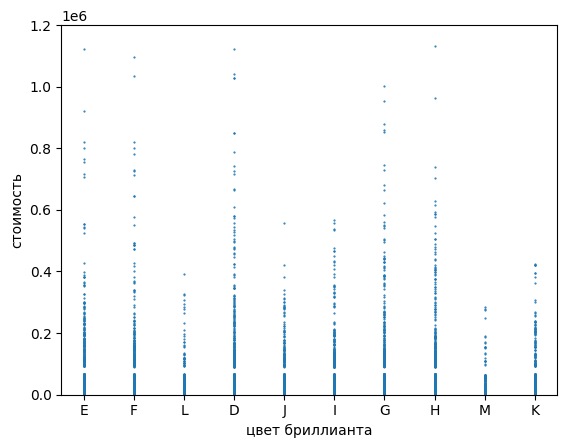

In [ ]:
import matplotlib.pyplot as plt
init_colors = diamonds["color"]
init_prices = diamonds["total_sales_price"]
colors = []
prices = []
for i in range(0, len(init_colors)):
  if (init_colors[i] != "unknown"):
    colors.append(init_colors[i])
    prices.append(init_prices[i])

plt.scatter(colors, prices, s=0.3)
plt.xlabel('цвет бриллианта')
plt.ylabel('стоимость')
plt.ylim(0, 1200000)
plt.show()

(2 балла) Постройте график `лаборатория оценивания - кол-во бриллиантов`:

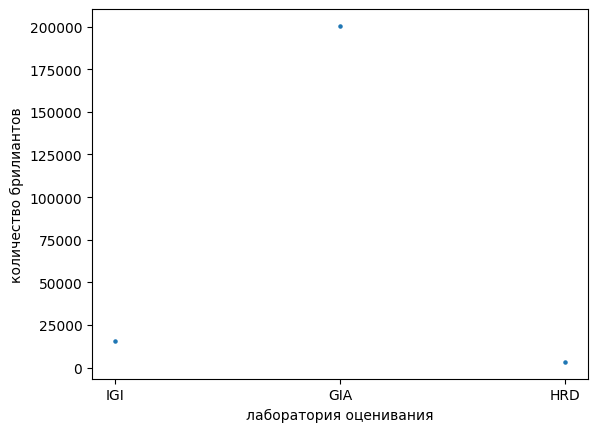

In [10]:
import matplotlib.pyplot as plt
init_labs = diamonds["lab"]
labs = {}
for i in range(0, len(init_labs)):
  if (init_labs[i] != "unknown"):
    try:
      labs[init_labs[i]] += 1
    except:
      labs[init_labs[i]] = 1

plt.scatter(labs.keys(), labs.values(), s=5)
plt.xlabel('лаборатория оценивания')
plt.ylabel('количество брилиантов')
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

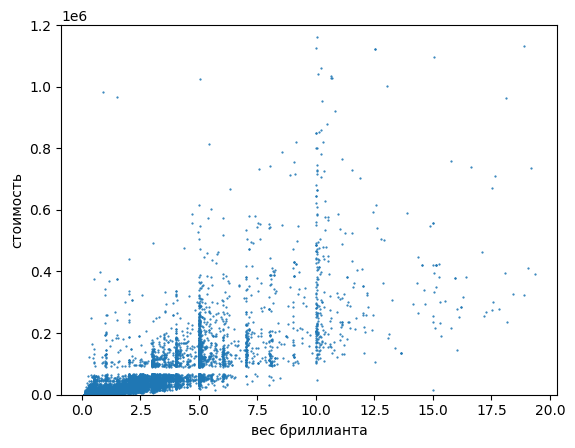

In [12]:
import matplotlib.pyplot as plt
init_weight = diamonds["carat_weight"]
init_prices = diamonds["total_sales_price"]
weight = []
prices = []
for i in range(0, len(init_weight)):
  if (init_weight[i] != "unknown"):
    weight.append(init_weight[i])
    prices.append(init_prices[i])

plt.scatter(weight, prices, s=0.3)
plt.xlabel('вес бриллианта')
plt.ylabel('стоимость')
plt.ylim(0, 1200000)
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

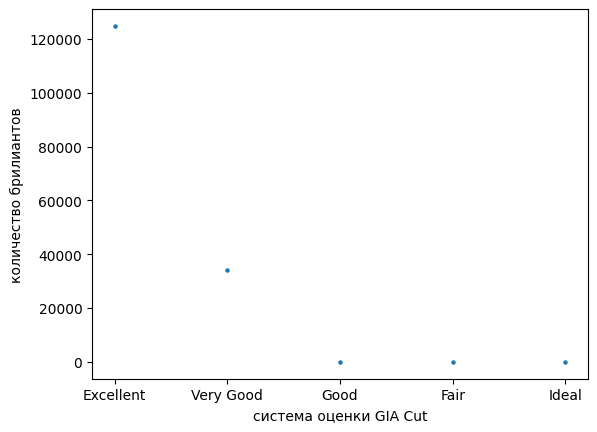

In [13]:
import matplotlib.pyplot as plt
init_labs = diamonds["cut_quality"]
labs = {}
for i in range(0, len(init_labs)):
  if (init_labs[i] != "unknown"):
    try:
      labs[init_labs[i]] += 1
    except:
      labs[init_labs[i]] = 1

plt.scatter(labs.keys(), labs.values(), s=5)
plt.xlabel('система оценки GIA Cut')
plt.ylabel('количество брилиантов')
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

Алма́з (от пратюрк. almaz, букв. «неподдающийся», через араб. ألماس‎ [’almās] и в др.-греч. ἀδάμας «несокрушимый») — минерал, кубическая аллотропная форма углерода[1].

При нормальных условиях метастабилен, то есть может существовать неограниченно долго. В вакууме или в инертном газе при повышенных температурах постепенно переходит в графит[2][3][4]. Самый твёрдый по шкале эталонных минералов твёрдости Мооса.

Возраст самого древнего обнаруженного алмаза составляет 3,6 миллиарда лет, а идеальный алмаз всего один 👍

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [5]:
diamonds = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
diamonds.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [6]:
diamonds = diamonds.sample(frac=1).reset_index(drop=True)
diamonds

,meas_length,meas_width,meas_depth,total_sales_price
0,4.34,4.37,2.59,648
1,4.85,4.88,2.98,1238
2,4.99,3.66,2.38,1284
3,6.26,6.31,4.00,3972
4,5.14,5.16,3.19,3540
...,...,...,...,...
219698,4.26,4.29,2.65,1118
219699,7.41,5.46,3.76,13182
219700,5.37,5.43,3.14,3770
219701,3.77,3.79,2.35,676


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [7]:
def minkowski_sum(row):
    p = 3
    return (row['meas_length']**p + row['meas_width']**p + row['meas_depth']**p)**(1/p)

# применение функции к каждой строке и сохранение результатов в новую колонку
diamonds['mink_sum'] = diamonds.apply(minkowski_sum, axis=1)

# вывод первых 5 строк для проверки
diamonds.head(5)

,meas_length,meas_width,meas_depth,total_sales_price,mink_sum
0,4.34,4.37,2.59,648,5.673002
1,4.85,4.88,2.98,1238,6.355898
2,4.99,3.66,2.38,1284,5.716038
3,6.26,6.31,4.00,3972,8.245288
4,5.14,5.16,3.19,3540,6.736069


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [8]:
new_data = diamonds[['total_sales_price', 'mink_sum']]
new_data

,total_sales_price,mink_sum
0,648,5.673002
1,1238,6.355898
2,1284,5.716038
3,3972,8.245288
4,3540,6.736069
...,...,...
219698,1118,5.592081
219699,13182,8.539826
219700,3770,7.019783
219701,676,4.946094


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(diamonds, test_size=0.2, random_state=42)

train_data

,meas_length,meas_width,meas_depth,total_sales_price,mink_sum
34255,5.61,5.66,3.55,3738,7.384108
33445,7.69,6.30,4.50,24525,9.267403
100701,8.10,5.13,3.25,5229,8.882315
158452,7.56,7.60,4.77,17861,9.931494
105041,4.69,4.71,2.89,1312,6.142747
...,...,...,...,...,...
119879,4.31,4.34,2.72,824,5.666357
103694,4.67,4.71,2.95,1020,6.144696
131932,5.89,5.74,3.95,9151,7.691854
146867,0.00,0.00,0.00,4204,0.000000


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

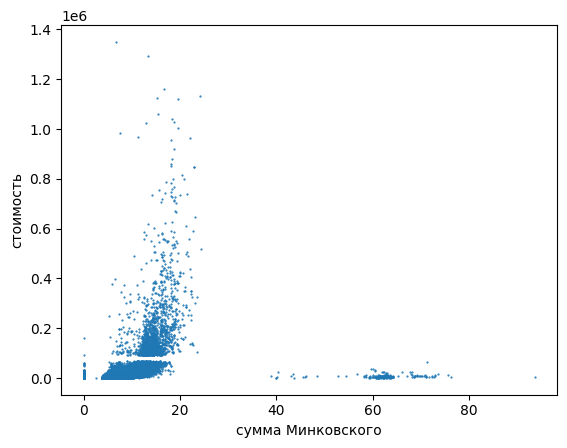

In [10]:
import matplotlib.pyplot as plt

plt.scatter(train_data["mink_sum"], train_data["total_sales_price"], s=0.3)
plt.xlabel('сумма Минковского')
plt.ylabel('стоимость')
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

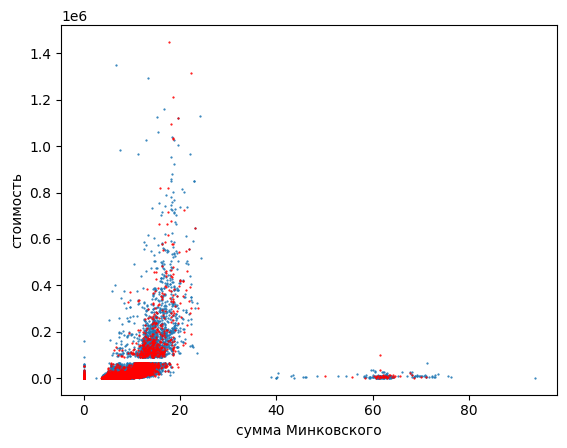

In [11]:
import matplotlib.pyplot as plt

plt.scatter(train_data["mink_sum"], train_data["total_sales_price"], s=0.3)
plt.scatter(test_data["mink_sum"], test_data["total_sales_price"], s=0.3, color='red')
plt.xlabel('сумма Минковского')
plt.ylabel('стоимость')
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [24]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2).fit(test_data)

temp_distances, temp_indices = neighbors.kneighbors(test_data)

distances = []
indices = []

for i in range(0, len(temp_distances)):
  distances.append(temp_distances[i][1])
  indices.append(temp_indices[i][1])

distances

[0.11231706794346012,
 0.022405683089040094,
 0.14754415542886737,
 0.12889122966792102,
 2.867920324403504,
 1.0954301330011225,
 0.022215479652667236,
 0.6200127139167079,
 0.014624971502601716,
 0.030769616365385423,
 0.024257101876470323,
 0.04047272522038419,
 0.09231818623157285,
 1.9976415775906693,
 0.07199089365015025,
 0.02880248626100699,
 0.7025107396202012,
 0.03722793949364846,
 0.031637315184725304,
 0.1279873532317911,
 0.022205574704982797,
 0.059105957739649176,
 0.0656990989286377,
 0.010237206459805569,
 0.5144343891454718,
 9.00529418507808,
 0.29892196816962713,
 0.039467493482371684,
 0.42980795296752455,
 8.391503616907496,
 0.12828883867274857,
 0.03947678506904667,
 0.04453569432120727,
 0.028694225603544156,
 1.4162420183717626,
 0.02927563827538366,
 0.018343312917708954,
 0.5580574526713385,
 0.017660555480444002,
 0.22429706829453017,
 0.24005891225393114,
 0.0,
 0.12128184332417123,
 0.023197090315624086,
 0.010237143357398474,
 0.08277490201307923,
 0.03

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [27]:
percents = []

for i in range(0, len(indices)):
  current_price = test_data.iloc[i]['total_sales_price']
  nearest_price = test_data.iloc[indices[i]]['total_sales_price']
  perc = abs(nearest_price - current_price) / current_price * 100
  percents.append(perc)

print(percents)

[0.0, 0.0, 0.0, 0.0, 0.0053870602812045466, 0.02433682161109759, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019037143582367376, 0.0, 0.0, 0.0, 0.03036876355748373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.046992481203007516, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.035631569570639586, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011519941017901988, 0.11587905124026798, 0.0, 0.011279043537108053, 0.0, 0.0, 0.0, 0.0, 0.03244295447172056, 0.0, 0.0, 0.0, 0.0, 0.015904572564612324, 0.0, 0.0, 0.0, 0.023424689622862496, 0.0, 0.0, 0.01383700013837, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015835312747426764, 0.0, 0.0, 0.0, 0.027425974356713977, 0.0, 0.0, 0.0, 0.020781379883624274, 0.030129557095510694, 0.0, 0.01577287066246057, 0.0, 0.0, 0

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [51]:
diamonds = pd.read_csv("diamonds.csv")
treats = ['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'girdle_min', 'girdle_max']
diamonds = diamonds[treats]

# idk why 'diamonds.dropna(inplace=True)' doesn't work

to_drop = set()

for i, row in diamonds.iterrows():
  for j in range(len(row)):
    if (diamonds.iloc[i, j] == "unknown" or
        diamonds.iloc[i, j] == None):
      to_drop.add(i)

diamonds = diamonds.drop(index=to_drop)

# -----------

diamonds

,cut,color,clarity,cut_quality,lab,symmetry,polish,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,STK,STK
...,...,...,...,...,...,...,...,...,...
219687,Round,D,VVS2,Excellent,GIA,Excellent,Excellent,TN,M
219689,Round,F,IF,Excellent,GIA,Excellent,Excellent,M,STK
219690,Round,D,VVS2,Excellent,GIA,Excellent,Excellent,M,STK
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,M,STK


In [62]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(diamonds)
column_names = encoder.get_feature_names_out(input_features=['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'girdle_min', 'girdle_max'])
encoded_data = pd.DataFrame(encoded_data.toarray(), columns=column_names)
encoded_data

,cut_Asscher,cut_Cushion,cut_Emerald,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,...,girdle_min_XTN,girdle_max_M,girdle_max_STK,girdle_max_STN,girdle_max_TK,girdle_max_TN,girdle_max_VTK,girdle_max_VTN,girdle_max_XTK,girdle_max_XTN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)